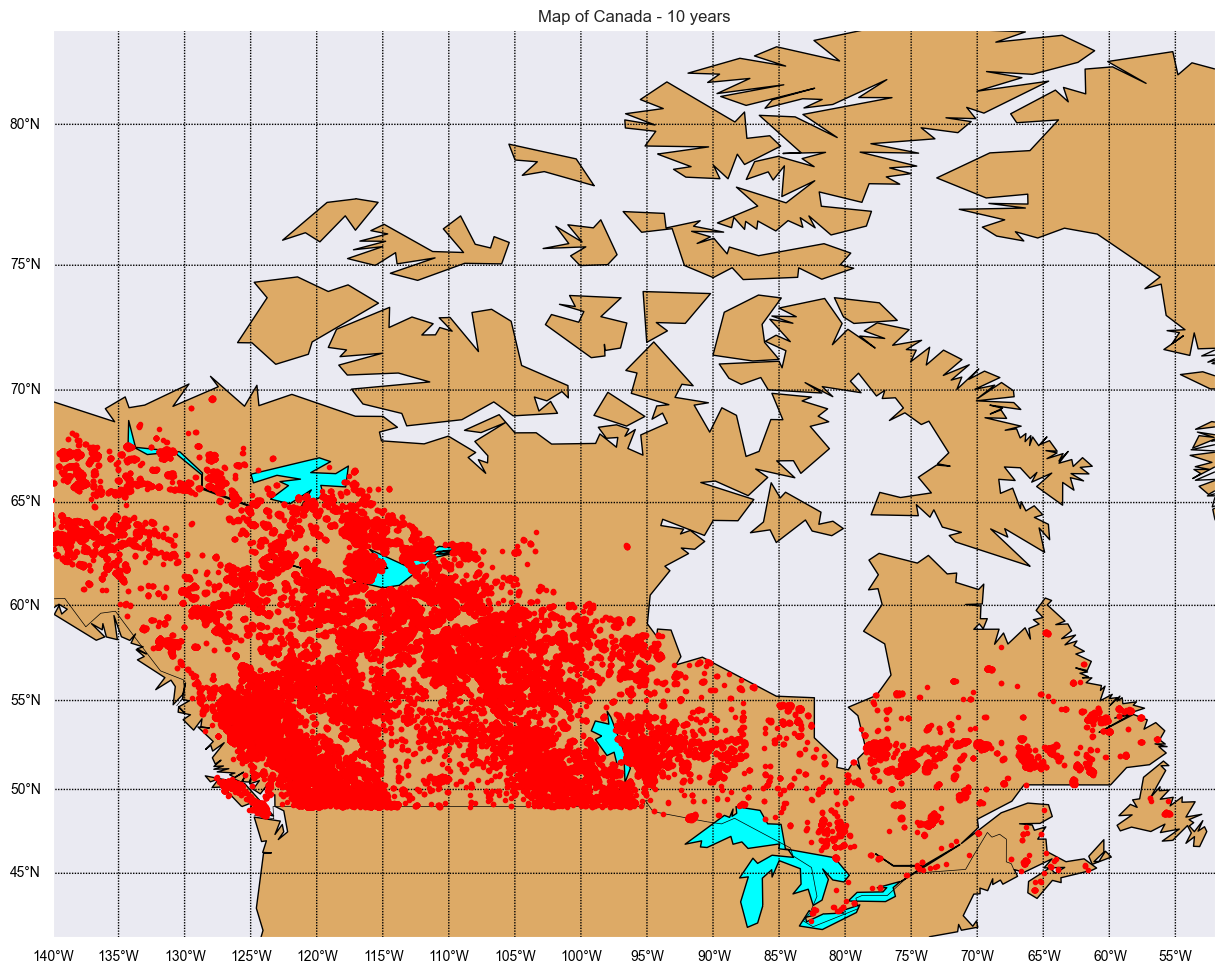

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import os
import pandas as pd

# Increase the size of the plot
plt.figure(figsize=(15, 15))

# latitide and longitude for Canada country
llon = -140
ulon = -52
llat = 41
ulat = 75

# Create a Basemap instance for Canada
m = Basemap(projection='mill', llcrnrlat=41, urcrnrlat=83, llcrnrlon=-140, urcrnrlon=-52, resolution='c')

# Draw the coastlines and country borders
m.drawcoastlines()
m.fillcontinents(color='#ddaa66',lake_color='aqua')
m.drawcountries()

# Specify the directory path
directory = './dataset/firedata/'

# Loop through files in the directory and reads fire records for each year 
# creates a scatter plot of fire ignition which is records with confidence >= 90 and type = 0 (which is vegetation fire)
for filename in os.listdir(directory):
    # Check if the current item is a file
    if filename == '.DS_Store':
        continue
    
    file_path = directory + filename
    #print(file_path)
    fire_data = pd.read_csv(file_path)
    #print(fire_data['latitude'])
    fire_data = fire_data.query("`confidence` >= 90 and `type` == 0")
    # Plot scatter points
    x, y = m(fire_data['longitude'], fire_data['latitude'])
    m.scatter(x, y, color='red', marker='.', zorder=5)  # zorder to plot points on top of the map


# Draw meridians and parallels
m.drawparallels(range(40, 90, 5), labels=[1,0,0,0], fontsize=10)
m.drawmeridians(range(-140, -50, 5), labels=[0,0,0,1], fontsize=10)

# Add a title
plt.title('Map of Canada - 10 years')

#plt.savefig('plot_10_years.png')

# Show the plot
plt.show()